<a href="https://colab.research.google.com/github/srinivasdasu24/Automation/blob/master/Scrapper_Google%2C_Quora%2C_SO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#required libraries
import pandas as pd
import requests
import json
from bs4 import BeautifulSoup

In [ ]:
urls = ["https://stackoverflow.com/questions/tagged/countif?tab=votes&page=1&pagesize=15"] 

In [2]:
access_tokken = "EdnvrJDP3DV2bTnqHBxZb2ytD"

In [ ]:
final_output = []

In [ ]:
res = []
for u in urls:
    print(u)
    url = f"https://api.quickscraper.co/parse?access_token={access_tokken}&url={u}"
    response = requests.get(f"{url}")
    res.append(response)
    soup = BeautifulSoup(response.content, 'html.parser')
    body = soup.find('div', class_='flush-left').find_all('div', class_='s-post-summary js-post-summary')
    for ques in body:
      fields = {}
      question = ques.find('a', class_='s-link')
      metadata = ques.find_all('div', class_='js-post-summary-stats')
      meta_info = []
      for meta in metadata:
        meta_info.append(meta.text)
      meta_info = meta_info[0].replace('\n','')
      meta_info = meta_info.replace('views', ',').replace('answers',',').replace('votes', ',').strip().replace(' ','').split(',')
      title = question.text
      qs_url = "https://stackoverflow.com" + question.get('href')
      try:
        print(meta_info)
        fields['url'] = qs_url
        fields['question'] = question.text
        fields['votes'] = meta_info[0]
        fields['answer'] = meta_info[1]
        fields['views'] = meta_info[2]
      except AttributeError as e:
        pass
      print(question)
      res.append(fields)
print(res)

https://stackoverflow.com/questions/tagged/countif?tab=votes&page=1&pagesize=15
['41', '4', '113k', '']
<a class="s-link" href="/questions/21419578/how-do-i-combine-countif-with-or">How do I combine COUNTIF with OR</a>
['17', '3', '84k', '']
<a class="s-link" href="/questions/13978701/count-number-of-cells-in-a-range-that-match-the-content-of-a-different-cell">Count number of cells in a range that match the content of a different cell</a>
['15', '4', '5k', '']
<a class="s-link" href="/questions/29647538/stdmapt-bool-count-values-that-are-true">std::map&lt;T, bool&gt;, count values that are true</a>
['13', '3', '24k', '']
<a class="s-link" href="/questions/23701470/excel-countif-not-equal-to-string-length-of-zero">Excel Countif Not equal to string length of zero</a>
['12', '1answer22k', '']
<a class="s-link" href="/questions/13151320/count-occurrences-of-values">Count occurrences of values</a>
['12', '1answer60k', '']
<a class="s-link" href="/questions/31713299/google-sheets-countif-cou

In [ ]:
final_output.append(res)

In [ ]:
df = pd.DataFrame(final_output[0][1:])

In [ ]:
print(final_output[0][1:])

[{'url': 'https://stackoverflow.com/questions/21419578/how-do-i-combine-countif-with-or', 'question': 'How do I combine COUNTIF with OR', 'votes': '41', 'answer': '4', 'views': '113k'}, {'url': 'https://stackoverflow.com/questions/13978701/count-number-of-cells-in-a-range-that-match-the-content-of-a-different-cell', 'question': 'Count number of cells in a range that match the content of a different cell', 'votes': '17', 'answer': '3', 'views': '84k'}, {'url': 'https://stackoverflow.com/questions/29647538/stdmapt-bool-count-values-that-are-true', 'question': 'std::map<T, bool>, count values that are true', 'votes': '15', 'answer': '4', 'views': '5k'}, {'url': 'https://stackoverflow.com/questions/23701470/excel-countif-not-equal-to-string-length-of-zero', 'question': 'Excel Countif Not equal to string length of zero', 'votes': '13', 'answer': '3', 'views': '24k'}, {'url': 'https://stackoverflow.com/questions/13151320/count-occurrences-of-values', 'question': 'Count occurrences of values'

In [ ]:
print(df)

                                                  url  \
0   https://stackoverflow.com/questions/21419578/h...   
1   https://stackoverflow.com/questions/13978701/c...   
2   https://stackoverflow.com/questions/29647538/s...   
3   https://stackoverflow.com/questions/23701470/e...   
4   https://stackoverflow.com/questions/13151320/c...   
5   https://stackoverflow.com/questions/31713299/g...   
6   https://stackoverflow.com/questions/18343969/c...   
7   https://stackoverflow.com/questions/14045332/e...   
8   https://stackoverflow.com/questions/54541962/h...   
9   https://stackoverflow.com/questions/48095934/e...   
10  https://stackoverflow.com/questions/45657896/c...   
11  https://stackoverflow.com/questions/21917381/e...   
12  https://stackoverflow.com/questions/40087843/h...   
13  https://stackoverflow.com/questions/44707078/i...   
14  https://stackoverflow.com/questions/16121530/h...   

                                             question votes      answer views  
0      

In [ ]:
df.to_csv("stackofout.csv", index=False)

In [ ]:
res[0].text

'COUNTIF function - Microsoft Supporthttps://support.microsoft.com › en-us › office › countif...https://support.microsoft.com › en-us › office › countif...Use COUNTIF, one of the statistical functions, to count the number of cells that meet a criterion; for example, to count the number of times a particular city\xa0...'

In [ ]:
urls = ["https://www.google.com/search?q=COUNTIF"]
result = []
count=0
page=1

In [ ]:
def google_scrapper(u):
  global count
  global result
  print(u)
  print(count)
  print("\n")
  url = f"https://api.quickscraper.co/parse?access_token={access_tokken}&url={u}"
  response = requests.get(f"{url}")
  soup = BeautifulSoup(response.content, 'html.parser')
  print(soup)
  try:
    question = soup.find("div", id = "search")
    #print(question)
    urls = question.find_all('a')
    #print(urls)
    for url in urls:
      fields = {}
      question_url = url.get('href')
      fields['url'] = question_url
      fields['question'] = url.text
      # if '/search?q=' in question_url and count <15:
      #   count +=1
      #   google_scrapper("https://www.google.com"+question_url)
      # else:
      #   result.append(fields)
      result.append(fields)
  except AttributeError as e:
    print(e)
    pass


    # result.append(fields)
    # question = soup.find("title")
    # print(question)
    # answers = soup.find_all("script")
    # print(answers[-3])
    # resp = answers[-3]
    # print(resp.find('edges'))

https://www.google.com/search?q=COUNTIF&start=10
https://www.google.com/search?q=COUNTIF&start=10
0


<!DOCTYPE html>
<html itemscope="" itemtype="http://schema.org/SearchResultsPage" lang="en"><head><meta charset="utf-8"/><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"/><title>COUNTIF - Google Search</title><script nonce="DgapRFRPXggV9dhzAsLJlQ">(function(){var b=window.addEventListener;window.addEventListener=function(a,c,d){"unload"!==a&&b(a,c,d)};}).call(this);(function(){window.google={kEI:'tQ7QY5vcHpy5qtsPptaZwAo',kEXPI:'31',kBL:'m-wt'};google.sn='web';google.kHL='en';})();(function(){
var f=this||self;var h,k=[];function l(a){for(var b;a&&(!a.getAttribute||!(b=a.getAttribute("eid")));)a=a.parentNode;return b||h}function m(a){for(var b=null;a&&(!a.getAttribute||!(b=a.getAttribute("leid")));)a=a.parentNode;return b}
function n(a,b,c,d,g){var e="";c||-1!==b.search("&ei=")||(e="&ei="+l(d),-1===b.search("&lei=")&&(d=m(d))&&(e+="&lei="+d))
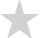
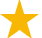
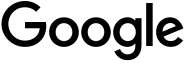
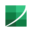
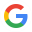
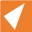

In [ ]:
for u in urls:
  u=u+"&start="+str(page*10)
  print(u)
  google_scrapper(u)
print(result)

In [ ]:
print(len(result))

601


In [ ]:
df1 = pd.DataFrame(result)

In [ ]:
print(df1)

                                                   url  \
0    https://support.microsoft.com/en-us/office/cou...   
1    https://support.google.com/websearch/answer/33...   
2         https://policies.google.com/privacy?hl=en-AU   
3           https://policies.google.com/terms?hl=en-AU   
4    https://corporatefinanceinstitute.com/resource...   
..                                                 ...   
596        https://www.youtube.com/watch?v=if4i55JB58M   
597      #fpstate=ive&vld=cid:7d148bf8,vid:if4i55JB58M   
598        https://www.youtube.com/watch?v=Ihkgs7T3Do0   
599      #fpstate=ive&vld=cid:e3963db0,vid:Ihkgs7T3Do0   
600       https://coefficient.io/countif-google-sheets   

                                              question  
0    COUNTIF functionMicrosoft · https://support.mi...  
1                                improve Google Search  
2                                       Privacy Policy  
3                                     Terms of Service  
4                 

In [ ]:
df1.to_csv("googlesearch.csv", index=False)

In [ ]:
def post_processing(res):
  new_urls = []
  new_res = []
  for item in res[1:]:
    if item['url'].startswith('/search?q='):
      new_urls.append("https://www.google.com"+item['url'])
    else:
      new_res.append(item)
  return new_urls, new_res

['https://www.google.com/search?q=Countif+%E4%BD%95%E3%81%8C%E3%81%A7%E3%81%8D%E3%82%8B%EF%BC%9F&sa=X&ved=2ahUKEwitwdOwodT8AhUCU_UHHTnQDYAQzmd6BAgkEAU', 'https://www.google.com/search?q=IF%E3%81%A8countif%E3%81%AE%E7%B5%84%E3%81%BF%E5%90%88%E3%82%8F%E3%81%9B%E3%81%AF%EF%BC%9F&sa=X&ved=2ahUKEwitwdOwodT8AhUCU_UHHTnQDYAQzmd6BAgpEAU', 'https://www.google.com/search?q=Countif%E3%81%AE%E8%A8%88%E7%AE%97%E5%BC%8F%E3%81%AF%EF%BC%9F&sa=X&ved=2ahUKEwitwdOwodT8AhUCU_UHHTnQDYAQzmd6BAgjEAU', 'https://www.google.com/search?q=Countifs+%3C%3E+%E3%81%AE%E6%84%8F%E5%91%B3%E3%81%AF%EF%BC%9F&sa=X&ved=2ahUKEwitwdOwodT8AhUCU_UHHTnQDYAQzmd6BAgqEAU']
https://www.google.com/search?q=Countif+%E4%BD%95%E3%81%8C%E3%81%A7%E3%81%8D%E3%82%8B%EF%BC%9F&sa=X&ved=2ahUKEwitwdOwodT8AhUCU_UHHTnQDYAQzmd6BAgkEAU
<div id="search"><div data-hveid="CAYQBA" data-ved="2ahUKEwjsopK4odT8AhXSHjQIHa9iCxYQGnoECAYQBA"><h1 class="Uo8X3b OhScic zsYMMe">Search Results</h1><div class="v7W49e" data-async-context="query:Countif%20%E4%BD%95%E
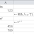
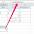
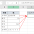
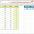
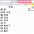
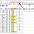
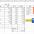
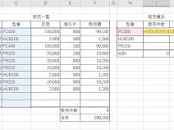
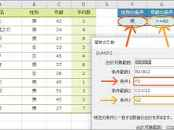
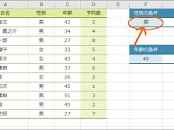
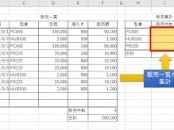
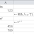
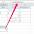
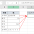
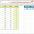
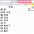
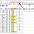
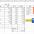

In [ ]:
new_urls, new_res = post_processing(res)
print(new_urls)
final_urls = []
final_res = []
res = google_scrapper(new_urls)


  

In [ ]:
print(new_res)
print(res[1:])

[{'url': 'https://support.microsoft.com/ja-jp/office/countif-%E9%96%A2%E6%95%B0-e0de10c6-f885-4e71-abb4-1f464816df34', 'question': 'COUNTIF 関数 - Microsoft サポートhttps://support.microsoft.com › ja-jp › office › countif-...'}, {'url': 'https://udemy.benesse.co.jp/business/office/excel-countif.html', 'question': 'エクセルのCOUNTIF関数はどう使う？複数条件の扱い方…https://udemy.benesse.co.jp › Microsoft Office'}, {'url': 'https://exceljoshi.cocoo.co.jp/media/excel-countif', 'question': '知っておきたい！COUNTIF関数を活用した効率的なデータ分析https://exceljoshi.cocoo.co.jp › media › excel-countif'}, {'url': 'https://dekiru.net/article/19807/', 'question': 'COUNTIF関数の使い方 - できるネットhttps://dekiru.net › article'}, {'url': '#', 'question': 'フィードバック'}, {'url': 'http://office-qa.com/Excel/ex183.htm', 'question': 'COUNTIF関数で複数条件（AND・OR）を指定する方法http://office-qa.com › Excel'}, {'url': 'https://azby.fmworld.net/lesson/excel-function/015/', 'question': 'COUNTIF関数で条件にあうデータを数えてみよう - My Cloudhttps://azby.fmworld.net › lesson › excel-function'}, {'url': 'h

In [ ]:
urls = ["https://www.quora.com/search?q=countif"]

In [ ]:
for u in urls:
    print(u)
    url = f"https://api.quickscraper.co/parse?access_token={access_tokken}&url={u}"
    response = requests.get(f"{url}")
    soup = BeautifulSoup(response.content, 'html.parser')
    print(soup)
    questions = soup.find_all("a", class_="question_link")
    for question in questions:
      print("Question is :", question.text)
      print("URL : https://www.quora.com" +question['href'])
      print("\n")

https://www.quora.com/search?q=countif
<!DOCTYPE html>
<html dir="ltr" lang="en" style="padding: 0; margin: 0;"><head prefix="og: http://ogp.me/ns#"><meta content="text/html; charset=utf-8" http-equiv="Content-Type"/><link as="script" href="https://qsc.cf2.quoracdn.net/-4-ans_frontend-relay-27-691154c7c2510bef.webpack" rel="preload"/><link as="script" href="https://qsc.cf2.quoracdn.net/-4-ans_frontend-relay-vendor-27-834d984225a15735.webpack" rel="preload"/><link as="script" href="https://qsc.cf2.quoracdn.net/-4-ans_frontend-relay-common-27-588d3982f6553b5d.webpack" rel="preload"/><link as="script" href="https://qsc.cf2.quoracdn.net/-4-ans_frontend-relay-page-SearchPageLoadable-27-66c27c60d3f1152f.webpack" rel="preload"/><link as="script" href="https://qsc.cf2.quoracdn.net/-4-ans_frontend-relay-common-LoggedOut-27-dd44caeac9d9511a.webpack" rel="preload"/><link as="style" href="https://qsc.cf2.quoracdn.net/-4-ans_frontend-relay-main.css-28-5cd7342bdadf70b7.webpack" rel="preload"/><link 

In [ ]:
urls = ["https://www.google.com/search?q=countif"]
page=1

In [ ]:
for u in urls:
    u=u+"&start="+page*10
    url = f"https://api.quickscraper.co/parse?access_token={access_tokken}&url={u}"
    response = requests.get(f"{url}")
    soup = BeautifulSoup(response.content, 'html.parser')
    res = soup.find_all("div", {"class":"g"})
    for r in res:
      link = r.find("a")
      question = r.find("h3", {"class":"LC20lb"})
      if question and link:
        print(question.text)
        print(link['href'])

https://www.google.com/search?q=countif
COUNTIF function - Microsoft Support
https://support.microsoft.com/en-us/office/countif-function-e0de10c6-f885-4e71-abb4-1f464816df34
COUNTIF - Google Docs Editors Help
https://support.google.com/docs/answer/3093480?hl=en
Excel COUNTIF function - Exceljet
https://exceljet.net/functions/countif-function
Excel COUNTIF Function - W3Schools
https://www.w3schools.com/excel/excel_countif.php
MS Excel: How to use the COUNTIF Function (WS)
https://www.techonthenet.com/excel/formulas/countif.php
How to Use The COUNTIF Google Sheets Function - Coefficient
https://coefficient.io/countif-google-sheets
Excel COUNTIF function examples - not blank, greater than ...
https://www.ablebits.com/office-addins-blog/excel-countif-function-examples/
How to Use Excel COUNTIF Function (Examples + Video)
https://trumpexcel.com/excel-countif-function/


In [ ]:
def scrape_g_question(u):
  url = f"https://api.quickscraper.co/parse?access_token={access_tokken}&url={u}"
  response = requests.get(f"{url}")
  soup = BeautifulSoup(response.content, 'html.parser')
  res = soup.find_all("div", {"class":"g"})
  for r in res:
    link = r.find("a")
    question = r.find("h3", {"class":"LC20lb"})
    if question and link:
      print(question.text)
      print(link['href'])
      # if "/search?q" in link["href"]:
      #   scrape_g_question(link["href"])
      print("\n")

In [ ]:
for u in urls:
  u=u+"&start="+str(page*10)
  print(u)
  scrape_g_question(u)

https://www.google.com/search?q=countif&start=10
Функція COUNTIF - Microsoft Support
https://support.microsoft.com/uk-ua/office/countif-%D1%84%D1%83%D0%BD%D0%BA%D1%86%D1%96%D1%8F-countif-e0de10c6-f885-4e71-abb4-1f464816df34


Функция COUNTIF | Справочные статьи Smartsheet
https://help.smartsheet.com/ru/function/countif


Функция СЧЁТЕСЛИ (COUNTIF) - Справочник
https://msoffice-prowork.com/ref/excel/excelfunc/statistical/countif/


COUNTIF - Cправка - Редакторы Google Документов
https://support.google.com/docs/answer/3093480?hl=ru


Функция СЧЁТЕСЛИ в Excel - countif - ExtendOffice
https://ru.extendoffice.com/excel/functions/excel-countif-function.html


Excel COUNTIF function - Exceljet
https://exceljet.net/functions/countif-function


Функция COUNTIF (СЧЁТЕСЛИ) в Excel. Как использовать?
https://excelhack.ru/finkciya-countif-schetesli-v-excel/




In [ ]:
# !apt update
!sudo apt remove chromium-chromedriver
!sudo apt install chromium-chromedriver
!sudo cp /usr/lib/chromium-browser/chromedriver /usr/bin
# !pip install selenium
# !snap install chromium
# !sudo add-apt-repository ppa:saiarcot895/chromium-beta

# !sudo apt remove chromium-browser
# !sudo snap remove chromium

# !sudo apt install chromium-browser
# !apt-get update
# !apt-get install chromium chromium-driver

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following packages will be REMOVED:
  chromium-chromedriver
0 upgraded, 0 newly installed, 1 to remove and 55 not upgraded.
After this operation, 15.9 MB disk space will be freed.
(Reading database ... 124227 files and directories currently installed.)
Removing chromium-chromedriver (1:101.0.4951.15-0ubuntu1~ppa1~18.04.1) ...
Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  chromium-chromedriver
0 upgraded, 1 newly installed, 0 to remove and 55 not upgraded.
Need to get 5,579 kB of archives.
After this operation, 15.9 M

In [3]:
%%shell
# Ubuntu no longer distributes chromium-browser outside of snap
#
# Proposed solution: https://askubuntu.com/questions/1204571/how-to-install-chromium-without-snap

# Add debian buster
cat > /etc/apt/sources.list.d/debian.list <<'EOF'
deb [arch=amd64 signed-by=/usr/share/keyrings/debian-buster.gpg] http://deb.debian.org/debian buster main
deb [arch=amd64 signed-by=/usr/share/keyrings/debian-buster-updates.gpg] http://deb.debian.org/debian buster-updates main
deb [arch=amd64 signed-by=/usr/share/keyrings/debian-security-buster.gpg] http://deb.debian.org/debian-security buster/updates main
EOF

# Add keys
apt-key adv --keyserver keyserver.ubuntu.com --recv-keys DCC9EFBF77E11517
apt-key adv --keyserver keyserver.ubuntu.com --recv-keys 648ACFD622F3D138
apt-key adv --keyserver keyserver.ubuntu.com --recv-keys 112695A0E562B32A

apt-key export 77E11517 | gpg --dearmour -o /usr/share/keyrings/debian-buster.gpg
apt-key export 22F3D138 | gpg --dearmour -o /usr/share/keyrings/debian-buster-updates.gpg
apt-key export E562B32A | gpg --dearmour -o /usr/share/keyrings/debian-security-buster.gpg

# Prefer debian repo for chromium* packages only
# Note the double-blank lines between entries
cat > /etc/apt/preferences.d/chromium.pref << 'EOF'
Package: *
Pin: release a=eoan
Pin-Priority: 500


Package: *
Pin: origin "deb.debian.org"
Pin-Priority: 300


Package: chromium*
Pin: origin "deb.debian.org"
Pin-Priority: 700
EOF

# Install chromium and chromium-driver
apt-get update
apt-get install chromium chromium-driver

# Install selenium
pip install selenium

Executing: /tmp/apt-key-gpghome.N7SnUsb46B/gpg.1.sh --keyserver keyserver.ubuntu.com --recv-keys DCC9EFBF77E11517
gpg: key DCC9EFBF77E11517: public key "Debian Stable Release Key (10/buster) <debian-release@lists.debian.org>" imported
gpg: Total number processed: 1
gpg:               imported: 1
Executing: /tmp/apt-key-gpghome.NX6ca1FoCL/gpg.1.sh --keyserver keyserver.ubuntu.com --recv-keys 648ACFD622F3D138
gpg: key DC30D7C23CBBABEE: public key "Debian Archive Automatic Signing Key (10/buster) <ftpmaster@debian.org>" imported
gpg: Total number processed: 1
gpg:               imported: 1
Executing: /tmp/apt-key-gpghome.HW66i3sXRZ/gpg.1.sh --keyserver keyserver.ubuntu.com --recv-keys 112695A0E562B32A
gpg: key 4DFAB270CAA96DFA: public key "Debian Security Archive Automatic Signing Key (10/buster) <ftpmaster@debian.org>" imported
gpg: Total number processed: 1
gpg:               imported: 1
Get:1 http://deb.debian.org/debian buster InRelease [122 kB]
Ign:2 https://developer.download.nvidia

In [ ]:
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from bs4 import BeautifulSoup
options = Options()
options.add_argument("--headless")
options.add_argument("--no-sandbox")

options.headless = True

driver = webdriver.Chrome("/usr/bin/chromedriver", options=options)
u="https://www.google.com/search?q=countif&start=10"
url = f"https://api.quickscraper.co/parse?access_token={access_tokken}&url={u}"
# navigate to the URL
driver.get(url)

# wait for the page to load
driver.implicitly_wait(10)

# click on the second page button
#driver.find_element("xpath", "//a[@aria-label='Page 2']").click()

# wait for the page to load
driver.implicitly_wait(10)

# get the HTML content of the page
html = driver.page_source

# parse the HTML using BeautifulSoup
soup = BeautifulSoup(html, 'html.parser')

# find all the search results on the page
results = soup.find_all("div", class_="g")

# print the title and URL of each search result
try:
  for result in results:
      title = result.find("h3").text
      url = result.find("a")["href"]
      print("Title: ", title)
      print("URL: ", url)
except:
  pass
# close the browser
driver.quit()


<ipython-input-33-6c1cbbeaef75>:8: DeprecationWarning: headless property is deprecated, instead use add_argument('--headless') or add_argument('--headless=new')
  options.headless = True
<ipython-input-33-6c1cbbeaef75>:10: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome("/usr/bin/chromedriver", options=options)


Title:  COUNTIF function - Microsoft Support
URL:  https://support.microsoft.com/en-us/office/countif-function-e0de10c6-f885-4e71-abb4-1f464816df34
Title:  COUNTIF Función | Artículos de ayuda de Smartsheet
URL:  https://help.smartsheet.com/es/function/countif
Title:  CONTAR.SI (COUNTIF) - Ayuda de Editores de Documentos ...
URL:  https://support.google.com/docs/answer/3093480?hl=es
Title:  Excel COUNTIF function - Exceljet
URL:  https://exceljet.net/functions/countif-function
Title:  COUNTIF - YouTube
URL:  https://www.youtube.com/watch?v=TmOxn9DUxqc
Title:  Cómo utilizar la fórmula COUNTIF en Microsoft Excel
URL:  https://diarioinforme.com/como-utilizar-la-formula-countif-en-microsoft-excel/
Title:  Excel COUNTIF function examples - not blank, greater than ...
URL:  https://www.ablebits.com/office-addins-blog/excel-countif-function-examples/
Title:  COUNTIF en Español - Traducción de las funciones de Excel
URL:  https://es.excelfunctions.eu/COUNTIF/Espanol
Title:  Función EXCEL COUNT

#using quickscrapper we are not getting proper results, without that we are getting

In [4]:
import requests
from bs4 import BeautifulSoup

url = 'https://www.quora.com/search?q=countif'
response = requests.get(url)
soup = BeautifulSoup(response.text, 'html.parser')

questions = []
urls = []
for item in soup.find_all(class_='search_result_title'):
    question = item.find('a').text
    questions.append(question)
    url = item.find('a')['href']
    urls.append(url)

print(questions)
print(urls)

[]
[]


In [18]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.chrome.options import Options
from bs4 import BeautifulSoup
options = Options()
options.add_argument("--headless")
options.add_argument("--no-sandbox")

options.headless = True

driver = webdriver.Chrome("/usr/bin/chromedriver", options=options)

url = 'https://www.quora.com/search?q=countif'


driver.get(url)
# wait for the page to load
driver.implicitly_wait(10)
# Wait for the search results to load
# wait = WebDriverWait(driver, 20)
# wait.until(EC.presence_of_element_located((By.CLASS_NAME, "search_result_title")))
# wait.until(EC.visibility_of_element_located((By.CLASS_NAME, "search_result_title")))
#driver.find_elements_by_class_name("search_result_title")
elements = driver.find_elements("xpath","/html/body/div[2]/div/div[2]/div/div[3]/div/div/div[2]/div/div/div[2]/*/span/a")
# Extract the questions and URLs
#//*[@id="mainContent"]/div/div/div[2]/div[2]/span/a
#/html/body/div[2]/div/div[2]/div/div[3]/div/div/div[2]/div/div/div[2]/div[2]/span/a
questions = []
urls = []
for item in elements:
    print(item.text)
    #question = item.find_element_by_tag_name("a").text
    questions.append(item.text)
    url = item.get_attribute("href")
    urls.append(url)

print(questions)
print(urls)

# Close the browser instance
driver.quit()


<ipython-input-18-f00b96d2731d>:11: DeprecationWarning: headless property is deprecated, instead use add_argument('--headless') or add_argument('--headless=new')
  options.headless = True
<ipython-input-18-f00b96d2731d>:13: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome("/usr/bin/chromedriver", options=options)


What's the difference between =COUNTIF() and =COUNTIFS() in Excel?
How do you use the COUNTIF function in Excel?
What are the differences between COUNT, COUNTA, COUNTIF and COUNTBLANK in MS-Excel?
What is the COUNTIFS function in Microsoft Excel used for?
How do I get an excel formula to automatically change the row it calculates every day? Formula for reference =COUNTIF ($94:$94,"PR") +COUNTIF ($94:$94,"PR/D") +COUNTIF ($94:$94,"T")
What is the difference between countif and countifs?
What is the difference between COUNTIF and COUNTIFS functions in Excel?
What are SUMIFS and COUNTIFS in Excel?
What is the formula that uses COUNTIFS with 2 categories: a table range + column range?
["What's the difference between =COUNTIF() and =COUNTIFS() in Excel?", 'How do you use the COUNTIF function in Excel?', 'What are the differences between COUNT, COUNTA, COUNTIF and COUNTBLANK in MS-Excel?', 'What is the COUNTIFS function in Microsoft Excel used for?', 'How do I get an excel formula to automat